RobustScaler
===

* Remueve la mediana y escala los datos de acuerdo con el rango intercuartil.

* Es un método de escalamiento robusto a outliers.

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

data = penguins[["flipper_length_mm"]]
data = data.rename(columns={"flipper_length_mm": "original"})

In [2]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler(
    # -------------------------------------------------------------------------
    # If True, center the data before scaling.
    with_centering=True,
    # -------------------------------------------------------------------------
    # If True, scale the data to interquartile range.
    with_scaling=True,
    # -------------------------------------------------------------------------
    # Quantile range used to calculate scale_.
    quantile_range=(0.25, 0.75),
    # -------------------------------------------------------------------------
    # If True, scale data so that normally distributed features have a variance 
    # of 1.
    unit_variance=False,
)

robustScaler.fit(data[["original"]])

data["transformed"] = robustScaler.transform(data[["original"]])

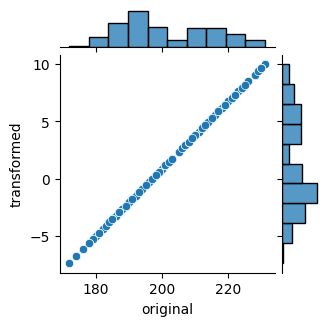

In [3]:
g = sns.jointplot(x="original", y="transformed", data=data, kind="scatter")
g.fig.set_figwidth(3)
g.fig.set_figheight(3)

In [4]:
display(
    robustScaler.center_,
    robustScaler.scale_,
)

array([197.])

array([3.41])